<a href="https://colab.research.google.com/github/jackpeck2004/SPECT_scanner_simulation/blob/main/SPECT_scanner_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation Problem 1: SPECT Scanner
If we have a large amount of radioactive material, which emits large amounts of radiation, we can model radioactive decay as a continuous function. However, if there are small number of decays in a sample, we need to consider their random behaviour. Consider a point source of 20 mill ion Technecium - 99m atoms (half life 6 hours). How could you simulate when and which direction individual gamma rays will be released?

A SPECT scanner has a relatively wide point spread function – the width of an image formed in response to a single point source of radiatio

Start by modelling a SPECT scanner as a 2D line of 51 detectors, each 3 mm wide. Place a point source of 20 million Technecium - 99m atoms d= 5 cm away from the middle element

## Data

In [ ]:
N = 20*10**6 # number of atoms
t_half = 6*60*60 # half life of Technicium-99m (6 hrs)

In [ ]:
import math

# Activity (decays/second)
activity = math.log(2)/t_half * N

print(f'activity: {activity} Bq')

activity: 641.8029449629123 Bq


In [ ]:
# duration of the decay
t = 1

# height of the point source
d = 5 * 10**-2

## Point Source

The source emits at random times, and gamma rays are emitted in random directions (any angle from 0 - 360 degrees). By simulating each decay event individually, run the simulation over one second of decays, and count how many gamma rays are detected by each detector element . Assume all gamma rays hitting each element will be detected.

In [ ]:
import numpy as np

# width of detector
detector_width = 3*10**-3
number_of_detectors = 51

detector_plane_width = number_of_detectors*detector_width

# calculate the range of angles for which a gamma ray hits a scanner
# assuming 0=360=bottom
def calculate_max_min_angle(detector_plane_width, distance_from_detector_plane):
  max_angle = np.rad2deg(np.arctan((detector_plane_width)/(2*distance_from_detector_plane)))
  min_angle = max_angle * -1
  return max_angle, min_angle


In [ ]:
def calculate_location_from_angle_direction(angle, d):
  return np.tan(np.deg2rad(angle))*d

In [ ]:
import random

def calculate_point_spread_fn(activity, t, min_angle, max_angle, number_of_detectors, distance_from_detector_plane):
  # create an array holding the detectors
  detectors = [0] * number_of_detectors

  # simulate the decay
  for i in range(int(activity*t)):
    # take a random direction
    direction = random.randint(-180, 180)
    # only maintain the ones which would hit the detector screen
    if (direction < max_angle and direction > min_angle):
      # calculate where the ray hits the detector screen
      location = calculate_location_from_angle_direction(direction, distance_from_detector_plane)
      # convert to mm
      location = calculate_location_from_angle_direction(
          direction,
          distance_from_detector_plane
          ) + calculate_location_from_angle_direction(
              np.rad2deg(np.arctan((detector_plane_width)/(2*distance_from_detector_plane))),
              distance_from_detector_plane
              )

      location = location*10**3
      # detector which hits
      detector = int(location // 3)
      detectors[detector] += 1
      # print(f"ray {i}\n\tdirection: {direction}deg\n\tlocation: {location}mm\n\tdetector: {detector}")

  return detectors

In [ ]:
import matplotlib.pyplot as plt

def plot_point_spread_fn(point_spread_fn, distance_from_source, append_title="", color="blue"):
  plt.title(f"Point Spread function with a pt source at d={distance_from_source*10**2}cm {append_title}")
  plt.xlabel("Detector")
  plt.ylabel("# of gamma rays detected")
  plt.plot(range(len(pt_spread)), pt_spread, color=color)

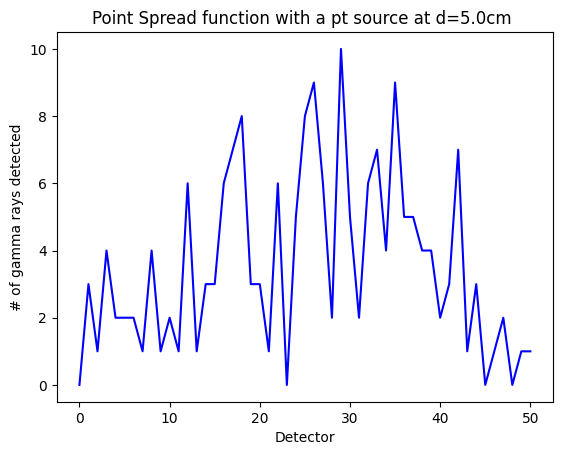

In [ ]:
# plot the graph

max_angle, min_angle = calculate_max_min_angle(detector_plane_width, d)
pt_spread = calculate_point_spread_fn(activity, t, min_angle, max_angle, number_of_detectors, d)
detected_gamma_rays_no_grid = sum(pt_spread)
plot_point_spread_fn(pt_spread, 5*10**-2)

## Collimator Grid
Now return to the initial location of 5 cm from the detector. Place a collimator grid with height 1 cm on the detector array. Assume all photons hitting the grid will be absorbed.
- How does this affect the point spread function?
- What is the efficiency of the detector array (what proportion of photons aimed at the detector will be detected)?
- How does this change with the height of the grid.

In [ ]:
import numpy as np

# create a collimator grid, returns a max and minimum angle for which rays are
# filtered out by the grid
def create_collimator_grid(grid_height, detector_width):
  max_angle = np.rad2deg(np.arctan(detector_width/grid_height))
  min_angle = max_angle * -1

  return max_angle, min_angle


efficiency: 31.318681318681318%


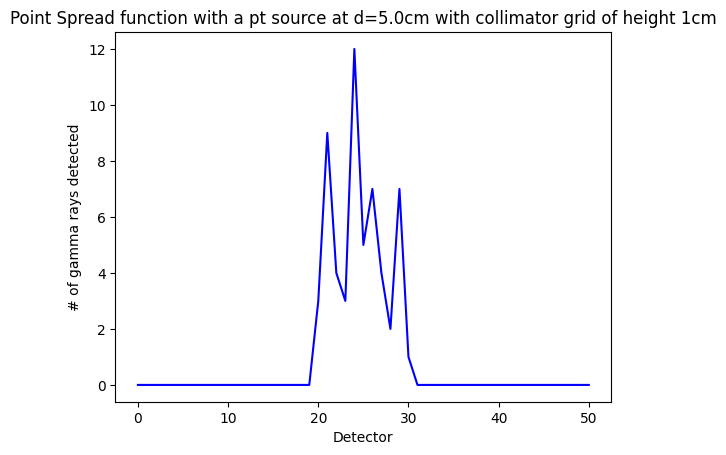

In [ ]:
max_angle, min_angle = create_collimator_grid(1*10**-2, 3*10**-3)
pt_spread = calculate_point_spread_fn(activity, t, min_angle, max_angle, number_of_detectors, d)
detected_gamma_rays_with_grid = sum(pt_spread)
plot_point_spread_fn(pt_spread, 5*10**-2, "with collimator grid of height 1cm")
efficiency = detected_gamma_rays_with_grid/detected_gamma_rays_no_grid * 100
print(f"efficiency: {efficiency}%")

## Dimensional Point Source
Now modify your point source to instead take up a circular region of diameter 1 cm. What does this look like on the scanner, with or without the grid?

In [ ]:
import numpy as np
import math

radius = 1*10**-2 / 2

delta_pos_x, delta_pos_y = 0, 0

def get_random_coordinates_in_circle(radius):
  # calculate a point in polar coordinates
  angle = random.uniform(0, 2*math.pi)
  point_radius = random.uniform(0, radius)

  x = np.cos(angle) * point_radius
  y = np.sin(angle) * point_radius
  return x, y


In [ ]:
import random

# Modifying the previous function by now adding an area from which the point
# source can come from

def calculate_point_spread_fn_from_region(
    activity,
    t,
    min_angle,
    max_angle,
    number_of_detectors,
    distance_from_detector_plane,
    point_source_diameter
    ):
  # create an array holding the detectors
  detectors = [0] * number_of_detectors

  # simulate the decay
  for i in range(int(activity*t)):
    # take a random position inside of the point source diameter
    radius = point_source_diameter / 2
    # random x variation from point source
    dx, dy = get_random_coordinates_in_circle(radius)

    # add the difference in the y position
    distance_from_detector_plane += dy

    # take a random direction
    direction = random.randint(-180, 180)

    # only maintain the ones which would hit the detector screen
    if (direction < max_angle and direction > min_angle):
      # calculate where the ray hits the detector screen
      location_1 = calculate_location_from_angle_direction(
          direction,
          distance_from_detector_plane
          ) + calculate_location_from_angle_direction(
              np.rad2deg(
                  np.arctan(
                      (detector_plane_width)/(2*distance_from_detector_plane))
                  ),
              distance_from_detector_plane
              )

      location_2 = location_1 + dx
      location = location_2*10**3
      # detector which hits
      detector = int(location // 3)
      print(f"ray {i}\n\tdirection: {direction}deg\n\tlocation 1: {location_1}mm\n\tdetector: {detector}\n\tdx,dy: {dx},{dy}") if location < 0 else None
      if (detector < number_of_detectors and location > 0):
        detectors[detector] += 1

  return detectors

In [ ]:
direction = 49
distance_from_detector_plane = 5*10**-3 + 9.61901106786156e-05

calculate_location_from_angle_direction(
          direction,
          distance_from_detector_plane
          ) + calculate_location_from_angle_direction(
              np.rad2deg(
                  np.arctan(
                      (detector_plane_width)/(2*distance_from_detector_plane))
                  ),
              distance_from_detector_plane) + 1.6160107398239866e-06


0.0823641121112567

In [ ]:
calculate_location_from_angle_direction(
              np.rad2deg(
                  np.arctan(
                      (detector_plane_width)/(2*distance_from_detector_plane))
                  ),
              distance_from_detector_plane
              )

0.07650000000000007

In [ ]:
1.6160107398239866e-06

1.6160107398239866e-06

56.83157917874052 -56.83157917874052
ray 678
	direction: 49deg
	location 1: -0.00099483816740277mm
	detector: -1
	dx,dy: 1.6160107398239866e-06,9.61901106786156e-05
ray 778
	direction: 45deg
	location 1: -0.02180421475738198mm
	detector: -8
	dx,dy: -0.0007070885178349354,-0.00022497939176459222
ray 788
	direction: 45deg
	location 1: -0.02229108332430281mm
	detector: -8
	dx,dy: -0.0008928130223752346,0.0027653117738168777
ray 806
	direction: 42deg
	location 1: -0.007522925913264436mm
	detector: -3
	dx,dy: -0.0006496841035868064,-0.000639560188928127
ray 834
	direction: 42deg
	location 1: -0.007235278588621621mm
	detector: -3
	dx,dy: -0.00023501107621913656,0.0010390285447594097
ray 839
	direction: 47deg
	location 1: -0.01046609486868448mm
	detector: -3
	dx,dy: 0.0017427402818809207,-0.0022187932798465536
ray 841
	direction: 51deg
	location 1: -0.022795533242082527mm
	detector: -8
	dx,dy: -0.00026446057096773934,-1.197632746493204e-05
ray 972
	direction: 54deg
	location 1: -0.01976279461

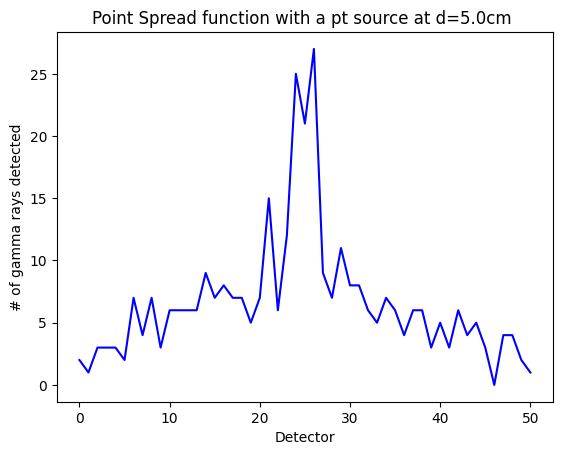

In [ ]:
max_angle, min_angle = calculate_max_min_angle(detector_plane_width, d)
print(max_angle, min_angle)
pt_spread = calculate_point_spread_fn_from_region(activity, 2, min_angle, max_angle, number_of_detectors, d, 1*10**-2)
plot_point_spread_fn(pt_spread, 5*10**-2)
# pt_spread = calculate_point_spread_fn(activity, 1, min_angle, max_angle, number_of_detectors, d)
# plot_point_spread_fn(pt_spread, 5*10**-2, color="red")